In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [23]:
# Load the dataset
df = pd.read_csv('../data/processed/customer_features_scaled.csv', index_col=0)
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\n" + "="*50)
print("Dataset Information:")
print(df.info())
print("\n" + "="*50)
print("Descriptive Statistics:")
print(df.describe())

Dataset shape: (3921, 16)

First 5 rows:
            Sum_Quantity  Mean_UnitPrice  Mean_TotalPrice  Sum_TotalPrice  \
CustomerID                                                                  
000nan          4.984467        1.506343        -0.268408        4.595722   
012346          3.789233       -2.120154         3.800623        3.161700   
012747          0.879252        0.879583         1.007144        1.397472   
012748          3.038005       -0.106556        -1.068898        2.706127   
012749          0.982814        1.125208         0.282588        1.379978   

            Count_Invoice  Count_Stock  Mean_InvoiceCountPerStock  \
CustomerID                                                          
000nan           2.432481     4.773105                   2.067962   
012346          -1.158633    -2.296006                  -1.015864   
012747           1.532615     0.156943                   1.957285   
012748           2.352800     3.983682                   1.982065   
01274

In [24]:
# Separate features and customer IDs
customer_ids = df.index  # CustomerID là index
X = df  # Tất cả các cột đều là features

# Check for missing values
print("Missing values in each column:")
print(X.isnull().sum())
print(f"\nTotal missing values: {X.isnull().sum().sum()}")

# Standardize the data (already scaled, but let's confirm)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"\nData shape after scaling: {X_scaled.shape}")

Missing values in each column:
Sum_Quantity                     0
Mean_UnitPrice                   0
Mean_TotalPrice                  0
Sum_TotalPrice                   0
Count_Invoice                    0
Count_Stock                      0
Mean_InvoiceCountPerStock        0
Mean_StockCountPerInvoice        0
Mean_UnitPriceMeanPerInvoice     0
Mean_QuantitySumPerInvoice       0
Mean_TotalPriceMeanPerInvoice    0
Mean_TotalPriceSumPerInvoice     0
Mean_UnitPriceMeanPerStock       0
Mean_QuantitySumPerStock         0
Mean_TotalPriceMeanPerStock      0
Mean_TotalPriceSumPerStock       0
dtype: int64

Total missing values: 0

Data shape after scaling: (3921, 16)


Original dimensions: 16
Dimensions after PCA: 4
Variance explained by 4 components: 95.95%


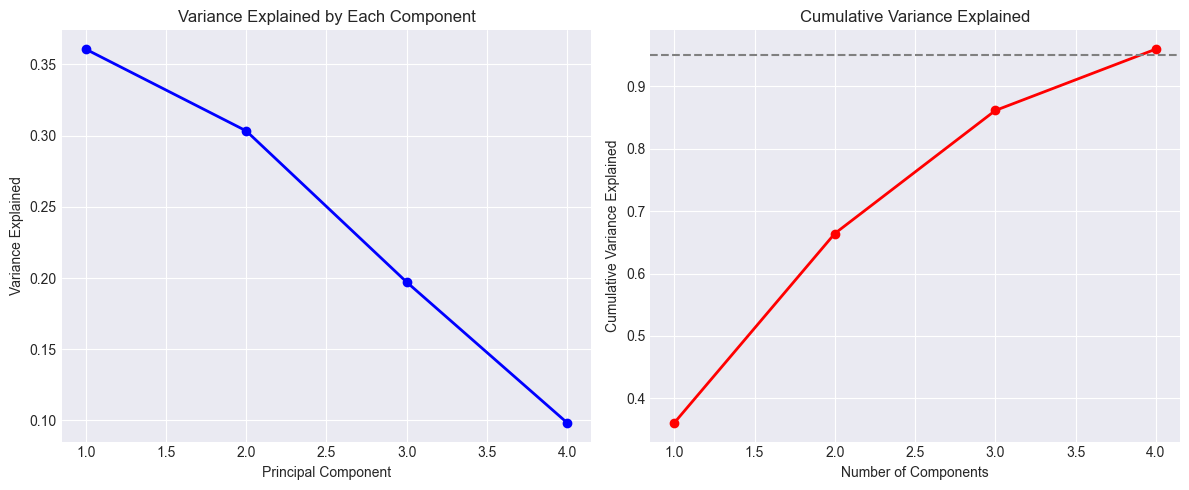

In [25]:
# Apply PCA for visualization and noise reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original dimensions: {X_scaled.shape[1]}")
print(f"Dimensions after PCA: {X_pca.shape[1]}")
print(f"Variance explained by {X_pca.shape[1]} components: {sum(pca.explained_variance_ratio_):.2%}")

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
components = range(1, len(pca.explained_variance_ratio_) + 1)
plt.plot(components, pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Component')

plt.subplot(1, 2, 2)
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='gray', linestyle='--')
plt.title('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

⚠️ Large dataset (3921 samples). Using 1000 samples for dendrogram.


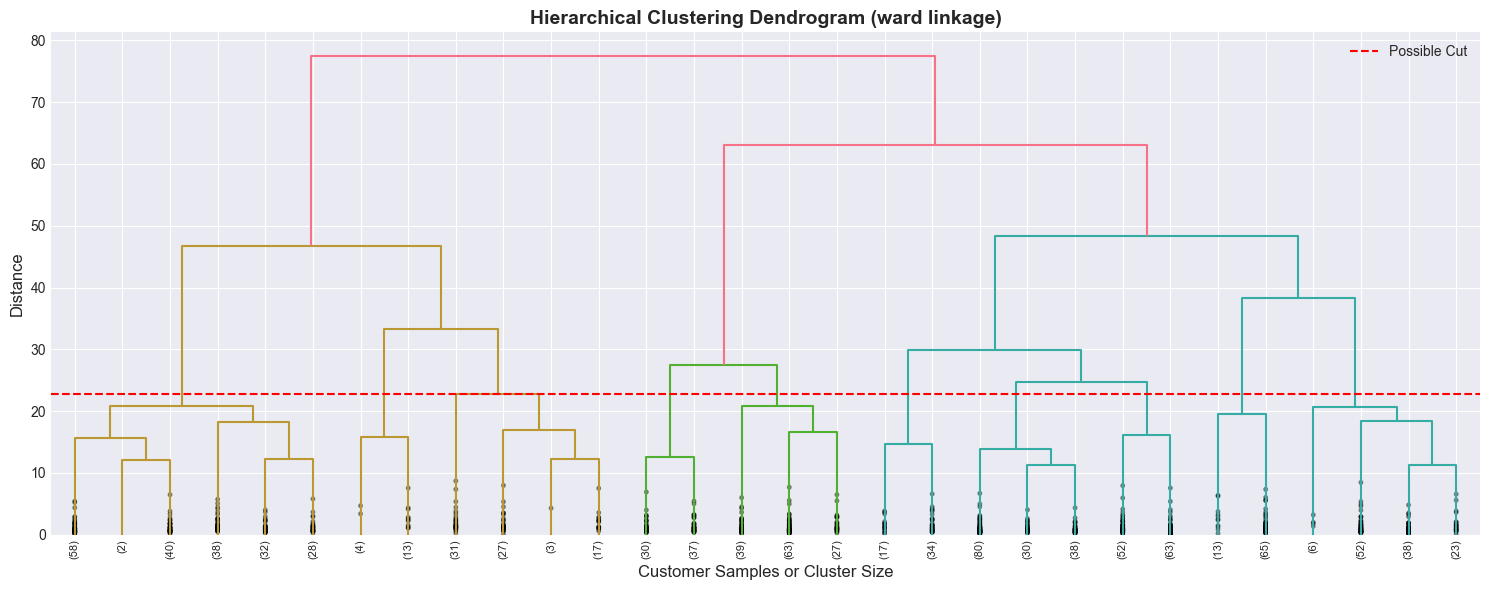

In [26]:
def plot_dendrogram(X_data, method='ward', sample_size=1000, random_state=42):
    """
    Plot dendrogram for hierarchical clustering with sampling for large datasets
    """
    n = X_data.shape[0]
    
    if n > sample_size:
        np.random.seed(random_state)
        idx = np.random.choice(n, size=sample_size, replace=False)
        X_sample = X_data[idx]
        print(f"⚠️ Large dataset ({n} samples). Using {sample_size} samples for dendrogram.")
    else:
        X_sample = X_data
        print(f"Dataset size ({n}). Plotting full dendrogram.")
    
    # Calculate linkage matrix
    Z = linkage(X_sample, method=method, metric='euclidean')
    
    # Plot dendrogram
    plt.figure(figsize=(15, 6))
    dendrogram(Z, 
               truncate_mode='lastp', 
               p=30, 
               show_leaf_counts=True, 
               leaf_rotation=90,
               leaf_font_size=8,
               show_contracted=True)
    
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)', fontsize=14, fontweight='bold')
    plt.xlabel('Customer Samples or Cluster Size', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.axhline(y=Z[-10, 2], color='red', linestyle='--', label='Possible Cut')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return Z

# Plot dendrogram
linkage_matrix = plot_dendrogram(X_pca, method='ward', sample_size=1000)

Evaluating different numbers of clusters...
k= 2 → Silhouette: 0.2088, DBI: 1.4888, Calinski-Harabasz: 959.13
k= 3 → Silhouette: 0.1929, DBI: 1.6813, Calinski-Harabasz: 960.31
k= 4 → Silhouette: 0.1662, DBI: 1.5001, Calinski-Harabasz: 860.68
k= 5 → Silhouette: 0.1656, DBI: 1.5623, Calinski-Harabasz: 818.69
k= 6 → Silhouette: 0.1473, DBI: 1.4427, Calinski-Harabasz: 757.70
k= 7 → Silhouette: 0.1397, DBI: 1.5126, Calinski-Harabasz: 719.31
k= 8 → Silhouette: 0.1488, DBI: 1.4841, Calinski-Harabasz: 685.97
k= 9 → Silhouette: 0.1489, DBI: 1.4904, Calinski-Harabasz: 667.30
k=10 → Silhouette: 0.1358, DBI: 1.5593, Calinski-Harabasz: 643.05

OPTIMAL NUMBER OF CLUSTERS
Based on Silhouette Score     → k = 2
Based on Davies-Bouldin Index → k = 6
Based on Calinski-Harabasz    → k = 3


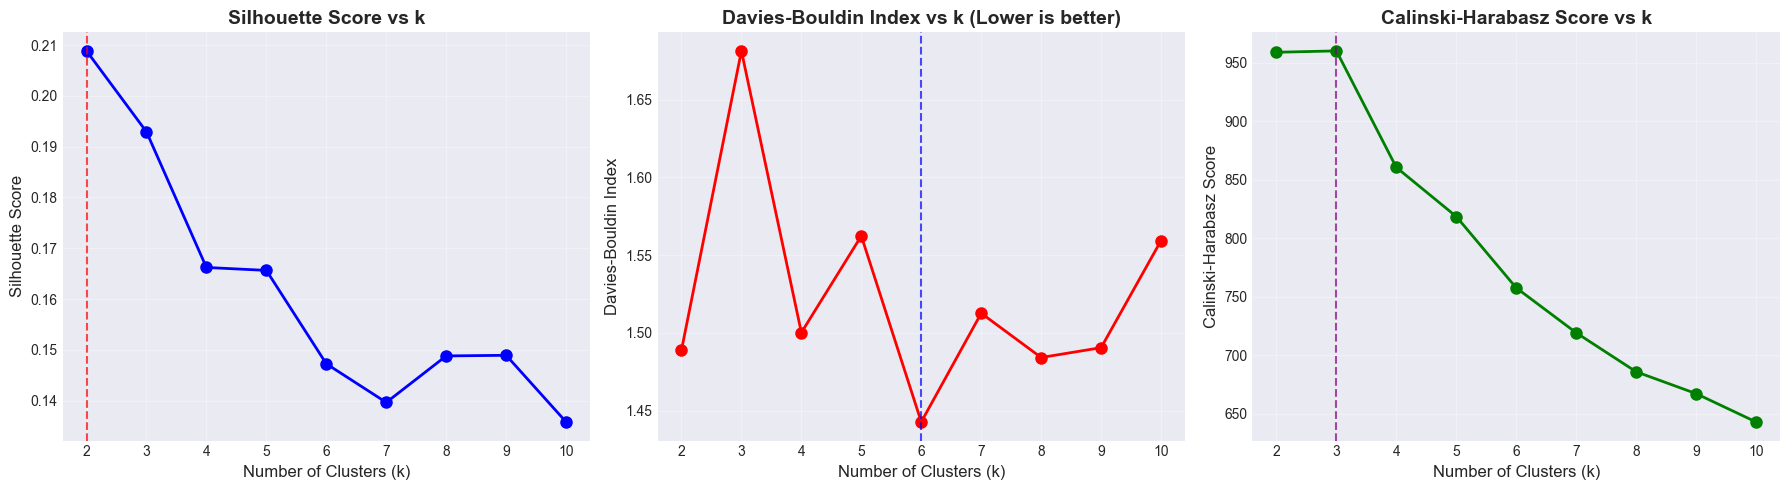


Selected number of clusters: k = 2


In [27]:
def evaluate_clusters(X_data, min_k=2, max_k=15, linkage_method='ward'):
    """
    Evaluate different numbers of clusters using multiple metrics
    """
    sil_scores = []
    dbi_scores = []
    ch_scores = []
    K_range = list(range(min_k, max_k + 1))
    
    for k in K_range:
        model = AgglomerativeClustering(
            n_clusters=k, 
            linkage=linkage_method,
            metric='euclidean'
        )
        labels = model.fit_predict(X_data)
        
        # Calculate metrics
        sil = silhouette_score(X_data, labels)
        dbi = davies_bouldin_score(X_data, labels)
        ch = calinski_harabasz_score(X_data, labels)
        
        sil_scores.append(sil)
        dbi_scores.append(dbi)
        ch_scores.append(ch)
        
        print(f"k={k:2d} → Silhouette: {sil:.4f}, DBI: {dbi:.4f}, Calinski-Harabasz: {ch:.2f}")
    
    return K_range, sil_scores, dbi_scores, ch_scores

# Evaluate different k values
print("Evaluating different numbers of clusters...")
print("="*70)
K_range, sil_scores, dbi_scores, ch_scores = evaluate_clusters(X_pca, min_k=2, max_k=10)

# Find optimal k based on different metrics
best_k_sil = K_range[np.argmax(sil_scores)]
best_k_dbi = K_range[np.argmin(dbi_scores)]
best_k_ch = K_range[np.argmax(ch_scores)]

print("\n" + "="*50)
print("OPTIMAL NUMBER OF CLUSTERS")
print("="*50)
print(f"Based on Silhouette Score     → k = {best_k_sil}")
print(f"Based on Davies-Bouldin Index → k = {best_k_dbi}")
print(f"Based on Calinski-Harabasz    → k = {best_k_ch}")

# Visualize metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(K_range, sil_scores, 'bo-', linewidth=2, markersize=8)
axes[0].axvline(x=best_k_sil, color='red', linestyle='--', alpha=0.7)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score vs k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Davies-Bouldin Index
axes[1].plot(K_range, dbi_scores, 'ro-', linewidth=2, markersize=8)
axes[1].axvline(x=best_k_dbi, color='blue', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1].set_title('Davies-Bouldin Index vs k (Lower is better)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Calinski-Harabasz Score
axes[2].plot(K_range, ch_scores, 'go-', linewidth=2, markersize=8)
axes[2].axvline(x=best_k_ch, color='purple', linestyle='--', alpha=0.7)
axes[2].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[2].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[2].set_title('Calinski-Harabasz Score vs k', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose final k (based on silhouette score which is most common)
final_k = best_k_sil
print(f"\nSelected number of clusters: k = {final_k}")

In [28]:
# Apply hierarchical clustering with optimal k
final_model = AgglomerativeClustering(
    n_clusters=final_k, 
    linkage='ward',
    metric='euclidean'
)

cluster_labels = final_model.fit_predict(X_pca)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Count customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\n" + "="*50)
print("CLUSTER DISTRIBUTION")
print("="*50)
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")


CLUSTER DISTRIBUTION
Cluster 0: 2952 customers (75.3%)
Cluster 1: 969 customers (24.7%)


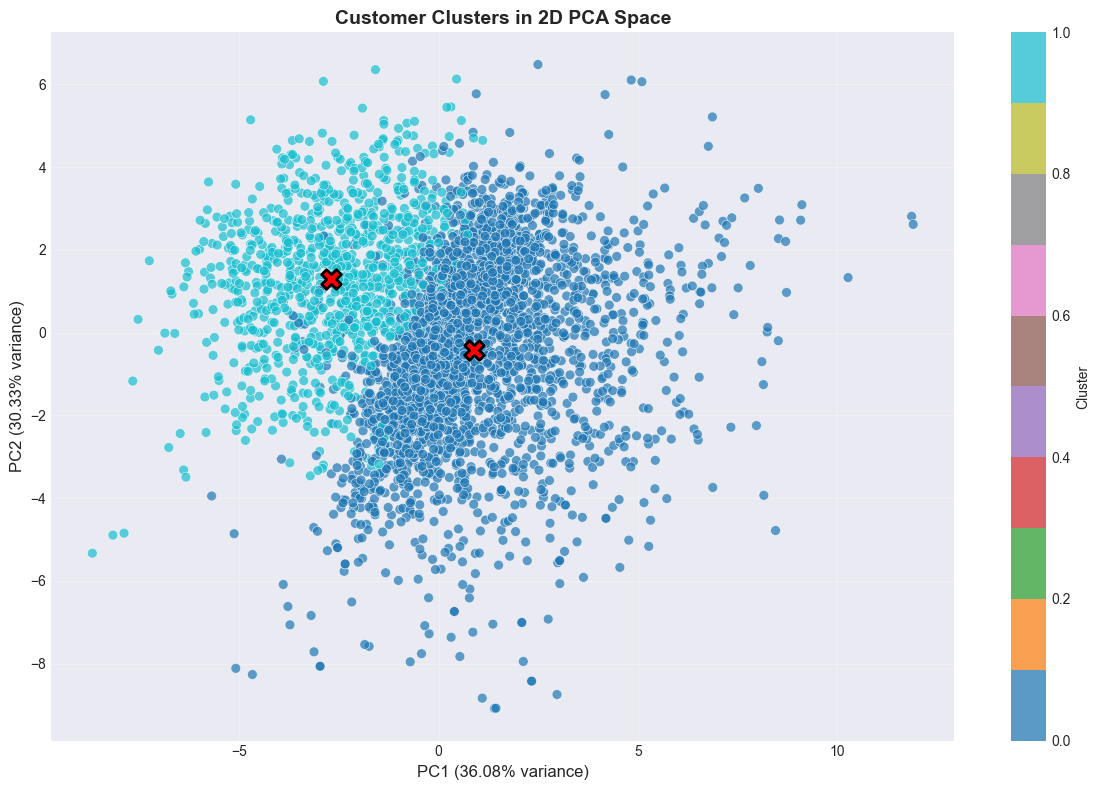


CLUSTER PROFILES

Cluster 0 Profile:
Top characteristics:
  - Mean_TotalPriceMeanPerStock: 0.426
  - Mean_TotalPrice: 0.426
  - Mean_TotalPriceMeanPerInvoice: 0.407
  - Mean_TotalPriceSumPerStock: 0.402
  - Mean_QuantitySumPerStock: 0.369
Lowest characteristics:
  - Mean_StockCountPerInvoice: -0.301
  - Count_Stock: -0.212
  - Mean_InvoiceCountPerStock: -0.050
  - Count_Invoice: 0.005
  - Mean_UnitPriceMeanPerInvoice: 0.027

Cluster 1 Profile:
Top characteristics:
  - Mean_StockCountPerInvoice: 0.918
  - Count_Stock: 0.645
  - Mean_InvoiceCountPerStock: 0.154
  - Count_Invoice: -0.014
  - Mean_UnitPriceMeanPerInvoice: -0.083
Lowest characteristics:
  - Mean_TotalPriceMeanPerStock: -1.299
  - Mean_TotalPrice: -1.299
  - Mean_TotalPriceMeanPerInvoice: -1.241
  - Mean_TotalPriceSumPerStock: -1.226
  - Mean_QuantitySumPerStock: -1.124


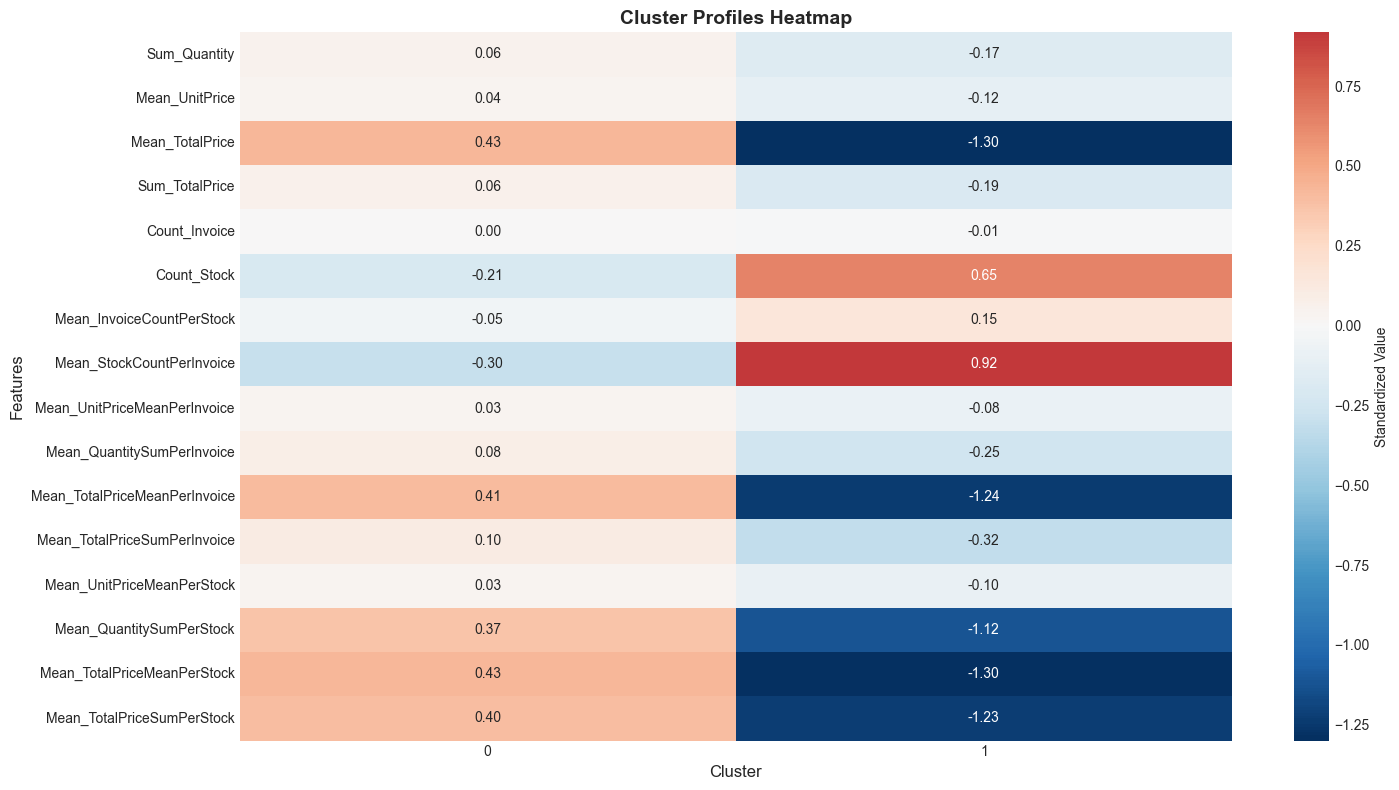

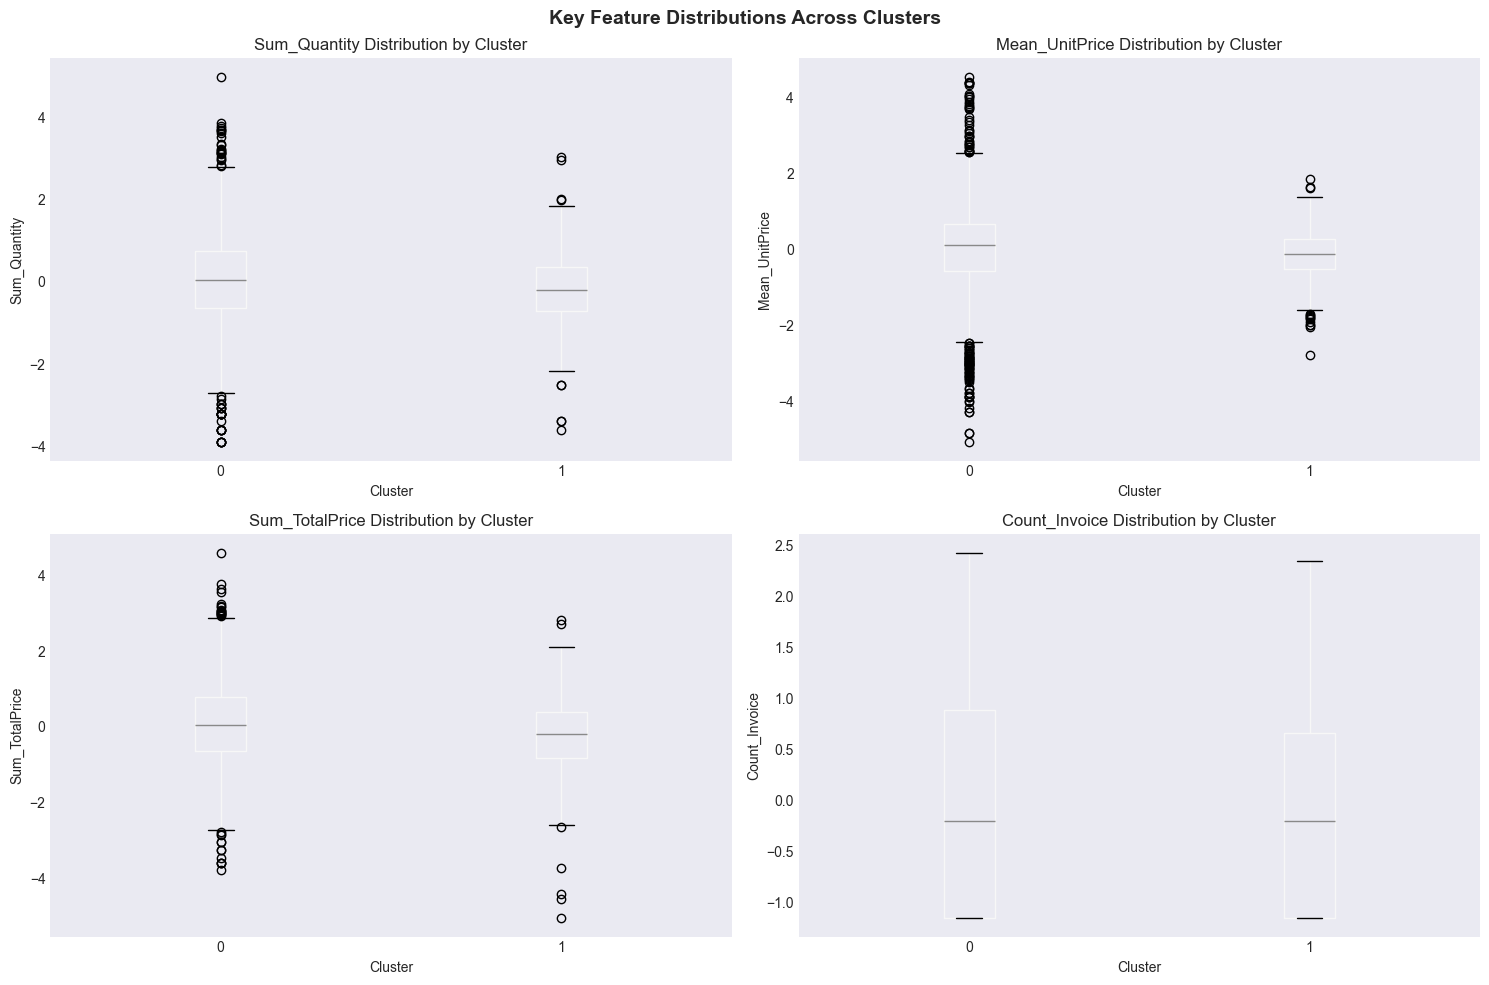

In [29]:
# 1. PCA Visualization of Clusters (2D)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], 
                      c=cluster_labels, 
                      cmap='tab10', 
                      s=50, 
                      alpha=0.7, 
                      edgecolors='w', 
                      linewidth=0.5)

plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Customer Clusters in 2D PCA Space', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add cluster centers
for cluster in range(final_k):
    cluster_points = X_2d[cluster_labels == cluster]
    center = cluster_points.mean(axis=0)
    plt.scatter(center[0], center[1], c='red', s=200, marker='X', edgecolors='black', linewidth=2)

plt.tight_layout()
plt.show()

# 2. Feature Importance per Cluster
print("\n" + "="*50)
print("CLUSTER PROFILES")
print("="*50)

# Calculate mean values for each cluster
cluster_profiles = df.groupby('Cluster').mean()
# Display top features for each cluster
for cluster in range(final_k):
    print(f"\nCluster {cluster} Profile:")
    cluster_mean = cluster_profiles.loc[cluster]
    
    # Get top 5 features with highest values
    top_features = cluster_mean.nlargest(5)
    print("Top characteristics:")
    for feature, value in top_features.items():
        print(f"  - {feature}: {value:.3f}")
    
    # Get bottom 5 features with lowest values
    bottom_features = cluster_mean.nsmallest(5)
    print("Lowest characteristics:")
    for feature, value in bottom_features.items():
        print(f"  - {feature}: {value:.3f}")

# 3. Heatmap of Cluster Profiles
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_profiles.T, 
            cmap='RdBu_r', 
            center=0, 
            annot=True, 
            fmt='.2f',
            cbar_kws={'label': 'Standardized Value'})
plt.title('Cluster Profiles Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Boxplot for Key Features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
key_features = ['Sum_Quantity', 'Mean_UnitPrice', 'Sum_TotalPrice', 'Count_Invoice']

for idx, feature in enumerate(key_features):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column=feature, by='Cluster', ax=ax, grid=False)
    ax.set_title(f'{feature} Distribution by Cluster', fontsize=12)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=0)

plt.suptitle('Key Feature Distributions Across Clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


FINAL MODEL VALIDATION
Silhouette Score: 0.2088
Davies-Bouldin Index: 1.4888
Calinski-Harabasz Score: 959.13

Interpretation Guidelines:
• Silhouette Score: Ranges from -1 to 1
  > 0.7: Strong structure
  > 0.5: Reasonable structure
  > 0.25: Weak structure
  < 0: Possibly no structure

• Davies-Bouldin Index: Lower is better
  < 0.5: Excellent separation
  < 1.0: Good separation
  > 1.0: Poor separation

BUSINESS RECOMMENDATIONS PER CLUSTER

Cluster 0 (2952 customers):
  • Average Customers: Moderate behavior
  • Action: Cross-selling, targeted promotions

Cluster 1 (969 customers):
  • Average Customers: Moderate behavior
  • Action: Cross-selling, targeted promotions


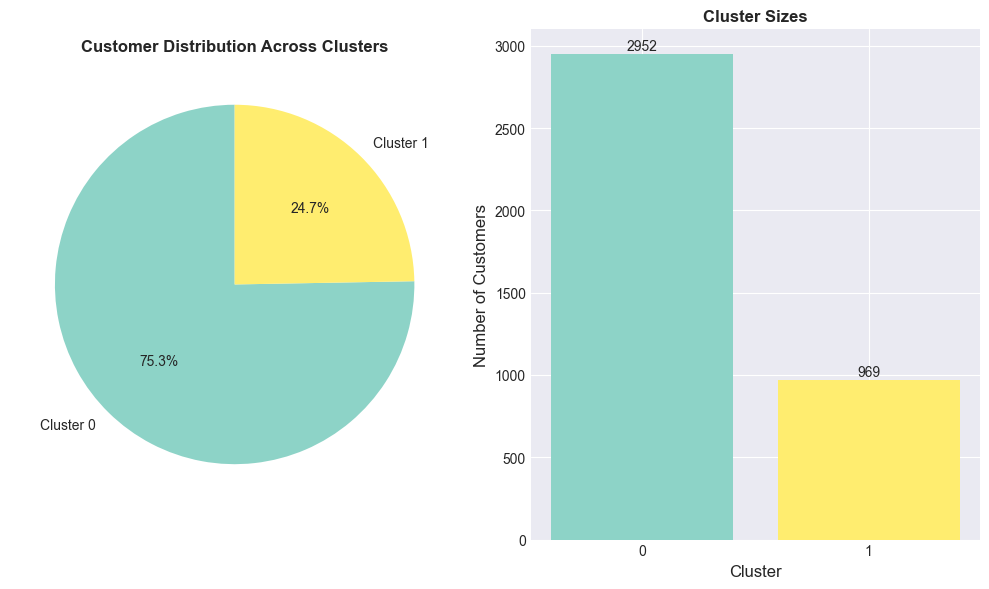

In [30]:
# Calculate final validation metrics
final_silhouette = silhouette_score(X_pca, cluster_labels)
final_dbi = davies_bouldin_score(X_pca, cluster_labels)
final_ch = calinski_harabasz_score(X_pca, cluster_labels)

print("\n" + "="*50)
print("FINAL MODEL VALIDATION")
print("="*50)
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"Davies-Bouldin Index: {final_dbi:.4f}")
print(f"Calinski-Harabasz Score: {final_ch:.2f}")

# Interpretation guidelines
print("\nInterpretation Guidelines:")
print("• Silhouette Score: Ranges from -1 to 1")
print("  > 0.7: Strong structure")
print("  > 0.5: Reasonable structure")
print("  > 0.25: Weak structure")
print("  < 0: Possibly no structure")

print("\n• Davies-Bouldin Index: Lower is better")
print("  < 0.5: Excellent separation")
print("  < 1.0: Good separation")
print("  > 1.0: Poor separation")

print("\n" + "="*50)
print("BUSINESS RECOMMENDATIONS PER CLUSTER")
print("="*50)

# Generate business recommendations
cluster_characteristics = {}

for cluster in range(final_k):
    cluster_data = df[df['Cluster'] == cluster]
    
    # Calculate key metrics
    avg_quantity = cluster_data['Sum_Quantity'].mean()
    avg_spend = cluster_data['Sum_TotalPrice'].mean()
    avg_price = cluster_data['Mean_UnitPrice'].mean()
    freq_purchases = cluster_data['Count_Invoice'].mean()
    
    cluster_characteristics[cluster] = {
        'size': len(cluster_data),
        'avg_quantity': avg_quantity,
        'avg_spend': avg_spend,
        'avg_price': avg_price,
        'freq_purchases': freq_purchases
    }
    
    print(f"\nCluster {cluster} ({len(cluster_data)} customers):")
    
    # Generate recommendations based on characteristics
    if avg_spend > 0.5 and freq_purchases > 0:
        print("  • VIP Customers: High spenders")
        print("  • Action: Offer premium loyalty program, exclusive access")
    elif avg_quantity > 0.5:
        print("  • Bulk Buyers: Purchase large quantities")
        print("  • Action: Volume discounts, bundle offers")
    elif freq_purchases > 0.5:
        print("  • Frequent Shoppers: Regular purchases")
        print("  • Action: Loyalty points, subscription model")
    elif avg_price < -0.5:
        print("  • Price Sensitive: Buy discounted items")
        print("  • Action: Special promotions, clearance sales")
    else:
        print("  • Average Customers: Moderate behavior")
        print("  • Action: Cross-selling, targeted promotions")

# 5. Customer Distribution Visualization
plt.figure(figsize=(10, 6))

# Pie chart for cluster distribution
plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, final_k))
plt.pie(cluster_counts.values, 
        labels=[f'Cluster {i}' for i in cluster_counts.index],
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Customer Distribution Across Clusters', fontsize=12, fontweight='bold')

# Bar chart for cluster sizes
plt.subplot(1, 2, 2)
bars = plt.bar(range(final_k), cluster_counts.values, color=colors)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Cluster Sizes', fontsize=12, fontweight='bold')
plt.xticks(range(final_k))

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [31]:
# Create comprehensive results dataframe
results_df = df.copy()

# Add PCA components for visualization
for i in range(min(3, X_pca.shape[1])):
    results_df[f'PC{i+1}'] = X_pca[:, i]

# Save results
output_path = '../result/Hirechical/customer_segmentation_results.csv'
results_df.to_csv(output_path, index=False)

print(f"\nResults saved to: {output_path}")
print(f"Total customers analyzed: {len(df)}")
print(f"Number of clusters created: {final_k}")
print(f"Best silhouette score achieved: {final_silhouette:.4f}")

# Summary report
print("\n" + "="*60)
print("CUSTOMER SEGMENTATION ANALYSIS COMPLETE")
print("="*60)
print("\nSummary Report:")
print(f"• Dataset: {df.shape[0]} customers, {df.shape[1]-2} features")
print(f"• Optimal clusters: {final_k}")
print(f"• Cluster quality: Silhouette = {final_silhouette:.3f}")
print(f"• Data reduction: {X.shape[1]} → {X_pca.shape[1]} dimensions")
print(f"• Variance retained: {sum(pca.explained_variance_ratio_):.1%}")

print("\nKey Insights:")
for cluster in range(final_k):
    size = cluster_counts[cluster]
    percentage = (size / len(df)) * 100
    print(f"  Cluster {cluster}: {size} customers ({percentage:.1f}%)")


Results saved to: ../result/Hirechical/customer_segmentation_results.csv
Total customers analyzed: 3921
Number of clusters created: 2
Best silhouette score achieved: 0.2088

CUSTOMER SEGMENTATION ANALYSIS COMPLETE

Summary Report:
• Dataset: 3921 customers, 15 features
• Optimal clusters: 2
• Cluster quality: Silhouette = 0.209
• Data reduction: 17 → 4 dimensions
• Variance retained: 96.0%

Key Insights:
  Cluster 0: 2952 customers (75.3%)
  Cluster 1: 969 customers (24.7%)


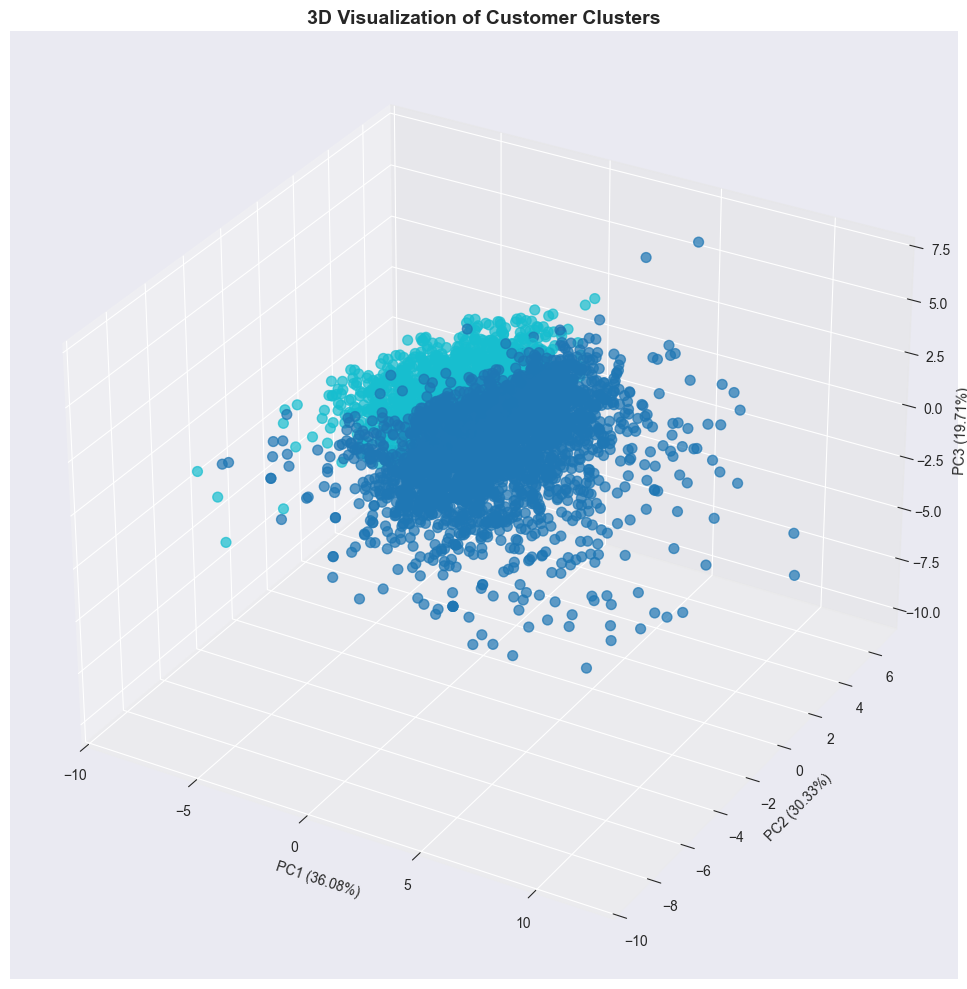

In [32]:
# Optional 3D visualization if 3+ PCA components
if X_pca.shape[1] >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                         c=cluster_labels, 
                         cmap='tab10',
                         s=50, 
                         alpha=0.7,
                         depthshade=True)
    
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=10)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=10)
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})', fontsize=10)
    ax.set_title('3D Visualization of Customer Clusters', fontsize=14, fontweight='bold')
    
    # Create legend
    legend1 = ax.legend(*scatter.legend_elements(),
                        title="Clusters",
                        loc="upper right",
                        bbox_to_anchor=(1.2, 0.9))
    ax.add_artist(legend1)
    
    plt.tight_layout()
    plt.show()